# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import librariess for sstatistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
#read the data
data = pd.read_csv('abtest.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.head() #returns first 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail() #returns last 5 rows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


The data contains 
- the unique IDs of the users, 
- their control/treatment group, 
- the landing page they saw, 
- the time spent on that landing page, 
- whether they were converted to a subscriber or not, and 
- their preferred language. 

In [6]:
# Number of Rows and Columns - df.shape will give the (rows, columns) of the df dataframe.
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns.')

There are 100 rows and 6 columns.


- The dataset contains the information of 100 users.

In [7]:
# Gives the statistical summary of df transposed for easy viewing. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


- the stats for user_id are not meaningful
- the average time spent on either page is about 5 minutes 23 seconds with a standard deviation of about 2 minutes 23 seconds
- the minimum time spent was about 11 seconds
- the maximum time spent was about 10 minutes 43 seconds
- 25% of users spent less than 3 minutes 53 seconds on the front page
- 50% of users spent less than 5 minutes 25 seconds on the front page
- 25% of users spent less than 7 minutes 1 second on the front page

In [8]:
# Checks the types of data within each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- The data in the `user_id` column is of integer type.
- The data in the `group`, `landing_page`, `converted`, and `language preferred` columns are all of the string type.
- The data in the `time_spent_on_the_page` column is of float type indicating that it is numerical.

In [9]:
# check unique values in object columns
print(df['group'].unique())
print(df['landing_page'].unique())
print(df['converted'].unique())
print(df['language_preferred'].unique())

#check for duplicates - will print [False] if no duplicates
print(df['user_id'].duplicated().unique())

['control' 'treatment']
['old' 'new']
['no' 'yes']
['Spanish' 'English' 'French']
[False]


- There are no missing values
- There are no duplicate user IDs

### Univariate Analysis

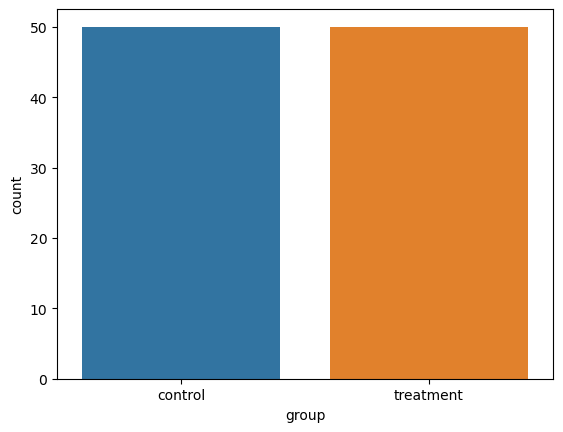

In [10]:
#creates a bar graph counting the number of users in the control and treatment groups
sns.countplot(data=df,x='group')
plt.show()

- the control and treatment groups are indeed 50/50

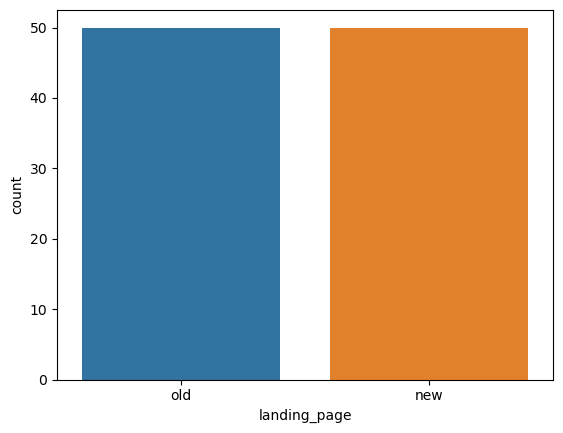

In [11]:
#creates a bar graph counting the number of users that saw the old and new landing pages
sns.countplot(data=df,x='landing_page')
plt.show()

- the number of old and new page landings are indeed 50/50

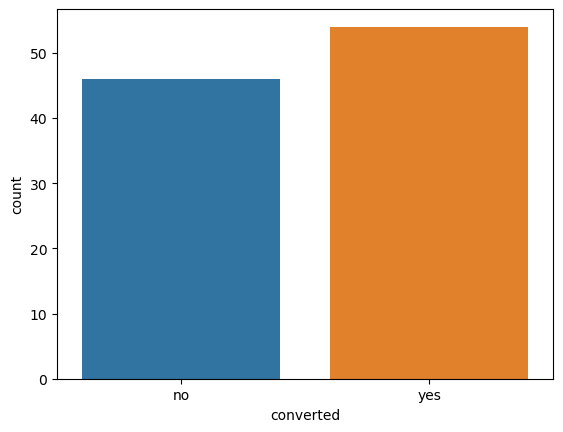

In [12]:
#creates a bar graph counting the number of users that did or did not subscribe
sns.countplot(data=df,x='converted')
plt.show()

- Of the 100 users, more were converted to subscribers than not. 

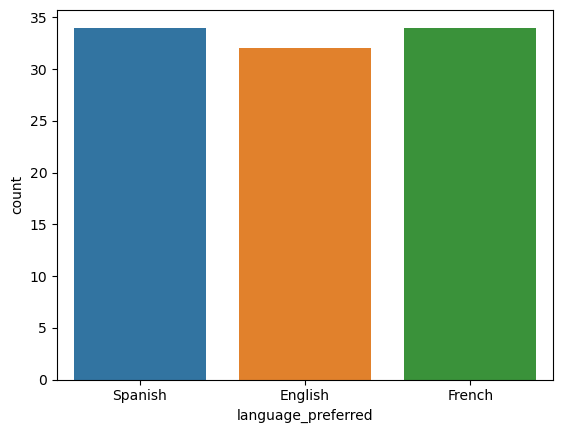

In [13]:
# creates a bar graph that counts the number of users that preferred each language
sns.countplot(data=df,x='language_preferred')
plt.show()

- All three languages are represented roughly equally. English is a little bit less than the other two. 

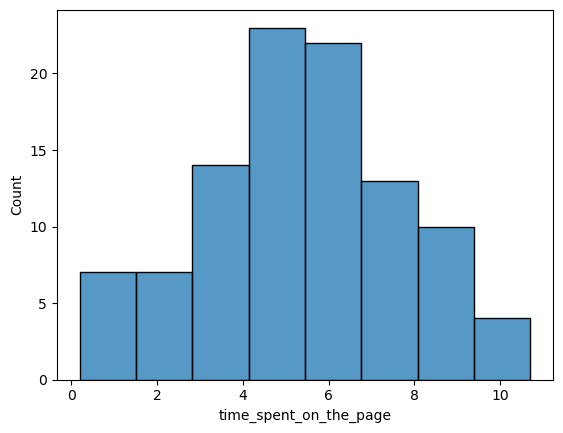

In [14]:
# creates a histogram that shows the distribution of times spent on the landing pages
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()

- The time users spend on the landing page seems to be symmetrical and approximately normally distributied.

### Bivariate Analysis

In [15]:
#check if every user in the control group got the old page and every user in the treatment group got the new page.
m = 0
for index, row in df.iterrows():
    if (row['group'] == 'control') & (row['landing_page'] == 'new'):
        m += 1 
    if (row['group'] == 'treatment') & (row['landing_page'] == 'old'):
        m += 1
print('The number of mismatches is: ' + str(m))

The number of mismatches is: 0


- Everyone in the treatment group got the new landing page, and everyone in the control group got the old landing page. 
- I can treat `group` and `landing_page` as the same variable going forward.

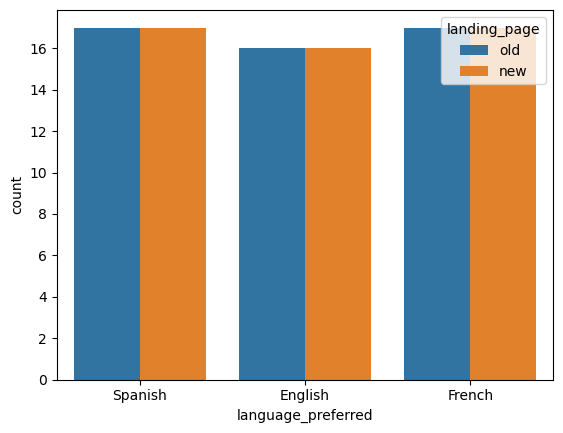

In [16]:
# creates a bar graph that counts the number of users who saw each landing page with each preferred language
sns.countplot(data=df, x='language_preferred', hue='landing_page')
plt.show()

- Each language was represented equally in the control and treatment groups.

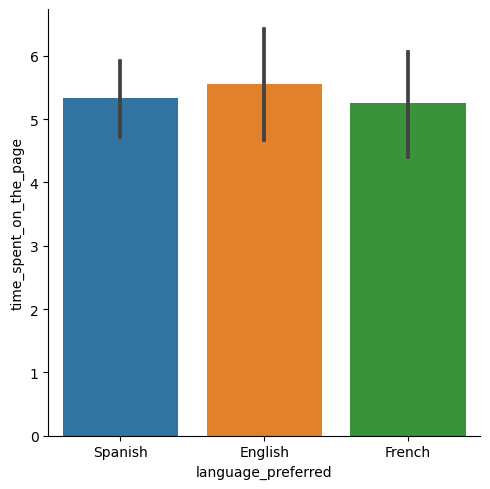

In [17]:
#time spent on page vs language preferred
sns.catplot(x='language_preferred', y='time_spent_on_the_page', data=df, kind='bar')
plt.show()

- English has the highest time spent on page. 
- However, all three languages are within each other 95% confidence intervals indicating no statistically significant difference.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

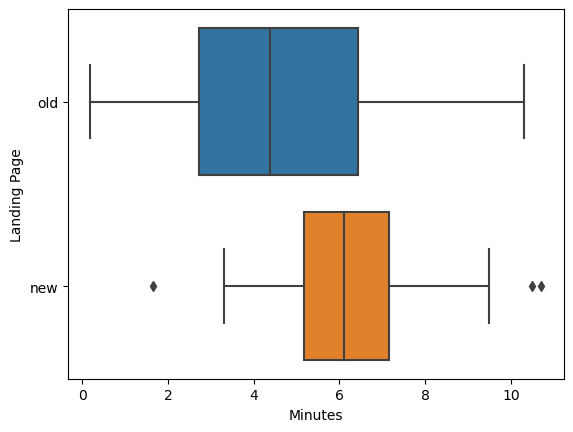

In [18]:
# visual analysis
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page',orient='h')
plt.xlabel('Minutes')
plt.ylabel('Landing Page')
plt.show()

- The variation for the treatment group is noticeably small than the variation for the control group.
- The median for the treatment group is nearly equal to the third quartile of the control group.
- These may indicate a significant difference in the mean times.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as follows:
> $H_0:$ The mean time spent on the new landing page is equal to the time spent on the existing landing page. <br>
$H_a:$ The mean time spent on the new landing page is more than on the existing landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the existing landing page and the new landing page, respectively. 

The above formulated hypotheses can be written mathematically as:
> $H_0: \mu_1 = \mu_2 $ <br>
$H_a: \mu_1 < \mu_2 $

### Step 2: Select Appropriate test

- The data is continuous and numerical
- We have a one-tailed alternative hypothesis.
- We are comparing the means of two populations.
- Since the control group is completely seperate from the treatment group, the two samples are independent.
- The population standard deviations are not given, and from the initial visual analysis, they are not equal. (An f-test is given below to be sure.)

#### A T-test for comparing means is appropriate here.

### Step 3: Decide the significance level

We've been given a significance level of $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [19]:
times_new = df.loc[df['landing_page'] == 'new', 'time_spent_on_the_page']
times_old = df.loc[df['landing_page'] == 'old', 'time_spent_on_the_page']

In [20]:
# a quick f-test to see if the standard deviations are in fact different
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(times_new, times_old)
p_value

0.00026322470561900095

### Step 5: Calculate the p-value

In [21]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(times_new, times_old, equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value) + '.')

The p-value is 0.0001392381225166549.


### Step 6: Compare the p-value with $\alpha$

In [22]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value, equal to {p_value}, is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value, equal to {p_value}, is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value, equal to 0.0001392381225166549, is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, there is sufficient evidence to reject the null hypothesis. Hence, there is enough statistical evidence to say the time spent on the new landing page is greater than the time spent on the existing landing page. 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

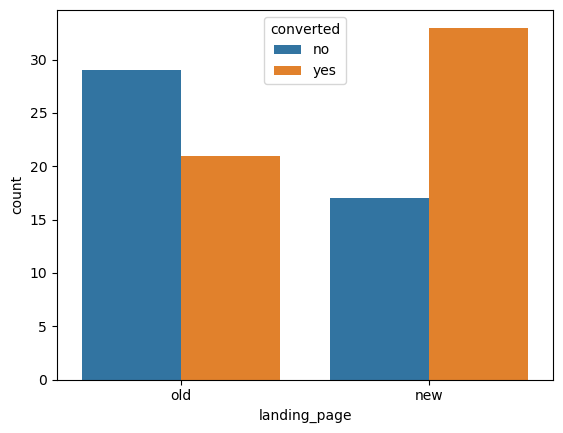

In [23]:
# visual analysis
sns.countplot(data=df, x='landing_page', hue='converted')
plt.show()
#sns.barplot()

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as follows:
> $H_0:$ The proportion of conversions on the new landing page is equal to the proportion of conversions on the old landing page. <br>
$H_a:$ The proportion of conversions on the new landing page is greater than the proportion of conversions on the old landing page.

Let $p_1$ and $p_2$ be the proportions of conversions the existing landing page and the new landing page, respectively. 

The above formulated hypotheses can be written mathematically as:
> $H_0: p_1 = p_2 $ <br>
$H_a: p_1 < p_2 $

### Step 2: Select Appropriate test

Univariate > Discrete > 2 samples > Two proportion z-test

- Binomially Distributed population - Yes, a user either subscribes or does not subscribe.
- Random Sampling - Yes, we were informed that the Data Science team conducted an experiment by randomly selecting 100 users.
- If the sample was taking with replacement or if the population is sufficiently large we may assume independence.
- Since $np$ and $nq$ for both groups are greater than 10 we can approximate this binomial distribution with a normal distribution: 
>$np_1 = 50 \cdot \frac{21}{50} = 21 \geq 10$ <br>
$nq_1 = 50 \cdot \frac{29}{50} = 29 \geq 10$ <br>
$np_2 = 50 \cdot \frac{33}{50} = 33 \geq 10$ <br>
$nq_2 = 50 \cdot \frac{17}{50} = 17 \geq 10$


### Step 3: Decide the significance level

We've been given a significance level of $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [24]:
# import the porportions test
from statsmodels.stats.proportion import proportions_ztest

# count the number of conversions
convs = np.array([len(df[(df['converted'] == 'yes') & (df['landing_page'] == 'new')]), len(df[(df['converted'] == 'yes') & (df['landing_page'] == 'old')])])
print(convs)
# set the sample sizes
nobs = np.array([len(df[df['landing_page'] == 'new']),len(df[df['landing_page'] == 'old'])])
print(nobs)

[33 21]
[50 50]


### Step 5: Calculate the p-value

In [25]:
# find the p-value
test_stat, p_value = proportions_ztest(convs, nobs)
print('The p-value is ' + str(p_value) + '.')

The p-value is 0.016052616408112556.


### Step 6: Compare the p-value with $\alpha$

In [26]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value, equal to {p_value}, is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value, equal to {p_value}, is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value, equal to 0.016052616408112556, is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, there is sufficient evidence to reject the null hypothesis. Hence, there is enough statistical evidence to say that the proportion of conversions on the new landing page is greater than the proportion of conversions on the old landing page. 

## 3. Is the conversion and preferred language independent or related?

### Perform Visual Analysis

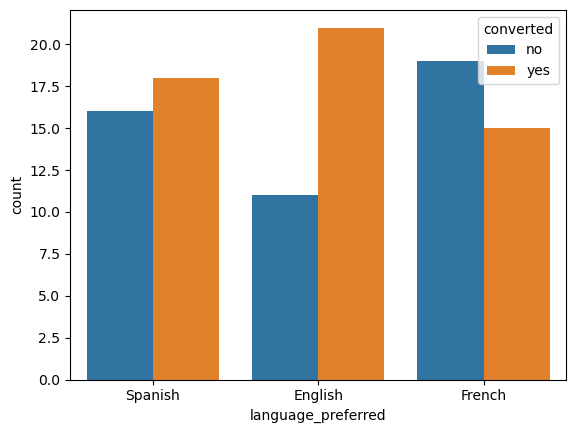

In [27]:
# A visual check of the counts of the conversion by language preferrence
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.show()

- All counts are more than 5

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as follows:
> $H_0:$ Conversion is independent of preferred language. <br>
$H_a:$ Conversion depends on preferred language.


### Step 2: Select Appropriate test

- Both variables are categorical.
- All counts are at least 5.
- Random sampling is given in the problem statement.

#### A $ \chi^2$-test for independence is appropriate.

### Step 3: Decide the significance level

We've been given a significance level of $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [28]:
lang = pd.crosstab(index=df['language_preferred'], columns=df['converted'])
lang

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [29]:
#import chi2_contingency
from scipy.stats import chi2_contingency

#find p-value
chi, p_value, dof, expected = chi2_contingency(lang)
print(p_value)

0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value, equal to {p_value}, is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value, equal to {p_value}, is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value, equal to 0.2129888748754345, is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, there is not sufficient evidence to reject the null hypothesis. Hence, we must conclude that conversion is independent of preferred language.

## 4. Is the time spent on the new page the same for the different language users?

### Perform Visual Analysis

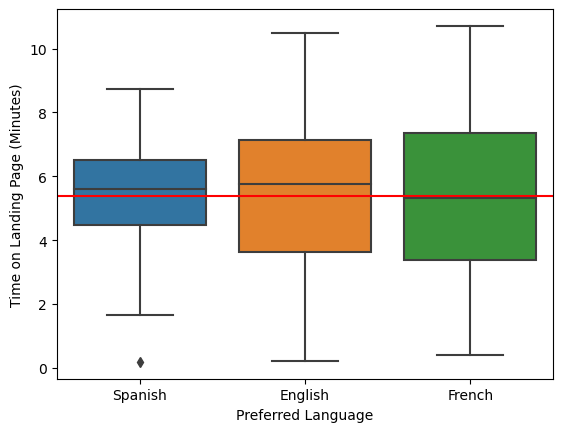

In [31]:
# creates side-by-side boxplots of the times spent on the landing pages by preferred language
sns.boxplot(data=df, x="language_preferred", y="time_spent_on_the_page")
plt.axhline(y=df['time_spent_on_the_page'].mean(), c='red') #creates a red line at the overall mean
plt.xlabel('Preferred Language')
plt.ylabel('Time on Landing Page (Minutes)')
plt.show()

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as follows:
> $H_0:$ The mean time spent on the new landing page is equal for all languages. <br>
$H_a:$ The mean time spent on the new landing page is not equal for all languages.

Let $\mu_S$, $\mu_E$ and $\mu_F$ be the mean time spent on the existing landing page for Spanish, English, and French, respectively. 

The above formulated hypotheses can be written mathematically as:
> $H_0: \mu_S = \mu_E = \mu_F $ <br>
$H_a:$ At least one of these means is not the same.

### Step 2: Select Appropriate test

- The normality assumption is checked using the Shapiro-Wilk's test in Step 4 below. Normality is confirmed.
- The equality of variances is checked using the Levene's test in step 4 below. Equality of variances is confirmed.

#### A one-way ANOVA test is appropriate.

### Step 3: Decide the significance level

We've been given a significance level of $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [33]:
#Shapiro-Wilk's test
from scipy import stats

w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print('The p-value is', p_value, '.')

The p-value is 0.5643193125724792 .


Since the p-value is large, we fail to reject the null hypothesis that the times spent on the landing page follow a normal distribution.

In [34]:
# Levene's Test
from scipy.stats import levene
statistic, p_value = levene(df['time_spent_on_the_page'][df['language_preferred']=='Spanish'],
                           df['time_spent_on_the_page'][df['language_preferred']=='English'],
                           df['time_spent_on_the_page'][df['language_preferred']=='French'],)
print('The p-value is', p_value,'.')

The p-value is 0.06515086840327314 .


Since the p-value is greater than $\alpha$, we fail to reject the null hypothesis of homogeneity of variances.

### Step 5: Calculate the p-value

In [35]:
# import F-test
from scipy.stats import f_oneway

# perform f-test
test_stat, p_value, = f_oneway(df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value) +'.')

The p-value is 0.8665610536012648.


### Step 6: Compare the p-value with $\alpha$

In [36]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'Since the p-value, equal to {p_value}, is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'Since the p-value = {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value = 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

At a 5% significance level, there is not sufficient evidence to reject the null hypothesis. Hence, there is not enough statistical evidence to say that the mean time spent on the new landing page is not equal for all languages.

## Conclusion and Business Recommendations

- Since the average time spent on the new page is significantly more than the average time spent on the old page, the new page should generate more subscribers than the old landing page.
- Indeed we do see the new page generating a larger proportion of new subscribers than we saw with the old landing page. 
- The conversion status seemed to be independent of the three languages.
- Similarly, we did not see a significant enough difference in the mean times spent on the new landing page across the three languages. 

___